## Hipótese: a região dos consumidores afeta quanto eles compram de certas categorias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

import numpy as np

### Carregamento dos dados

In [2]:
all_orders = pd.read_csv("../datasets/trusted/all_orders.csv", index_col=0)
all_orders.count()

order_id                         99441
customer_unique_id               99441
customer_city                    99441
customer_state                   99441
order_approved_at                99281
order_purchase_timestamp         99441
order_estimated_delivery_date    99441
order_delivered_carrier_date     97658
order_delivered_customer_date    96476
dtype: int64

In [3]:
products = pd.read_csv('../datasets/trusted/sold_products.csv', index_col=0)
products.count()

product_id                       104881
order_id                         104881
price                            104881
freight_value                    104881
order_purchase_timestamp         104881
order_estimated_delivery_date    104881
order_delivered_carrier_date     104881
order_delivered_customer_date    104881
product_category_name            104881
product_name_lenght              104881
product_description_lenght       104881
product_photos_qty               104881
product_weight_g                 104881
product_length_cm                104881
product_height_cm                104881
product_width_cm                 104881
dtype: int64

### Análise por estado e categoria

In [4]:
columns = ['order_id', 'product_category_name', 'customer_state']
orders_by_category = pd.merge(all_orders, products, on='order_id')[columns]
orders_by_category.head()

,order_id,product_category_name,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,utilidades_domesticas,SP
1,53cdb2fc8bc7dce0b6741e2150273451,perfumaria,BA
2,47770eb9100c2d0c44946d9cf07ec65d,automotivo,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,pet_shop,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,papelaria,SP


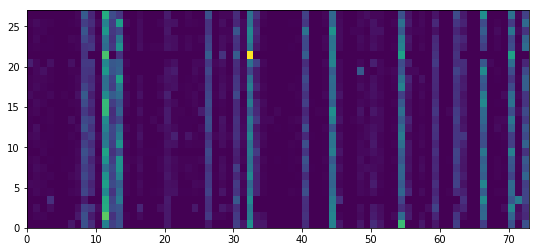

In [5]:
category_by_state = orders_by_category.groupby(["customer_state", "product_category_name"]).agg("count")

state_category_table = category_by_state.unstack().fillna(0)
states = state_category_table.index

normalized_stuff = pd.DataFrame(
    [state_category_table.loc[row] / state_category_table.loc[row].sum() for row in states])

plt.figure(figsize=(9, 4))
plt.pcolormesh(normalized_stuff)

In [6]:
from pandas.plotting import parallel_coordinates

a = normalized_stuff.reset_index()['order_id']
a['state'] = category_by_state.unstack().index
a.head()

product_category_name,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,...,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas,state
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.012821,0.000000,0.051282,0.025641,...,0.000000,0.000000,0.038462,0.0,0.000000,0.000000,0.051282,0.000000,0.051282,AC
1,0.000000,0.002653,0.002653,0.000000,0.0,0.0,0.000000,0.013263,0.050398,0.015915,...,0.000000,0.000000,0.068966,0.0,0.000000,0.000000,0.066313,0.010610,0.023873,AL
2,0.000000,0.006711,0.000000,0.006711,0.0,0.0,0.000000,0.006711,0.040268,0.033557,...,0.000000,0.000000,0.067114,0.0,0.000000,0.006711,0.093960,0.006711,0.026846,AM
3,0.000000,0.000000,0.000000,0.027778,0.0,0.0,0.000000,0.000000,0.013889,0.000000,...,0.000000,0.000000,0.097222,0.0,0.000000,0.000000,0.055556,0.083333,0.041667,AP
4,0.000874,0.004371,0.002331,0.002914,0.0,0.0,0.002622,0.004079,0.041958,0.024767,...,0.000291,0.000291,0.061480,0.0,0.001748,0.001748,0.068765,0.002914,0.041084,BA


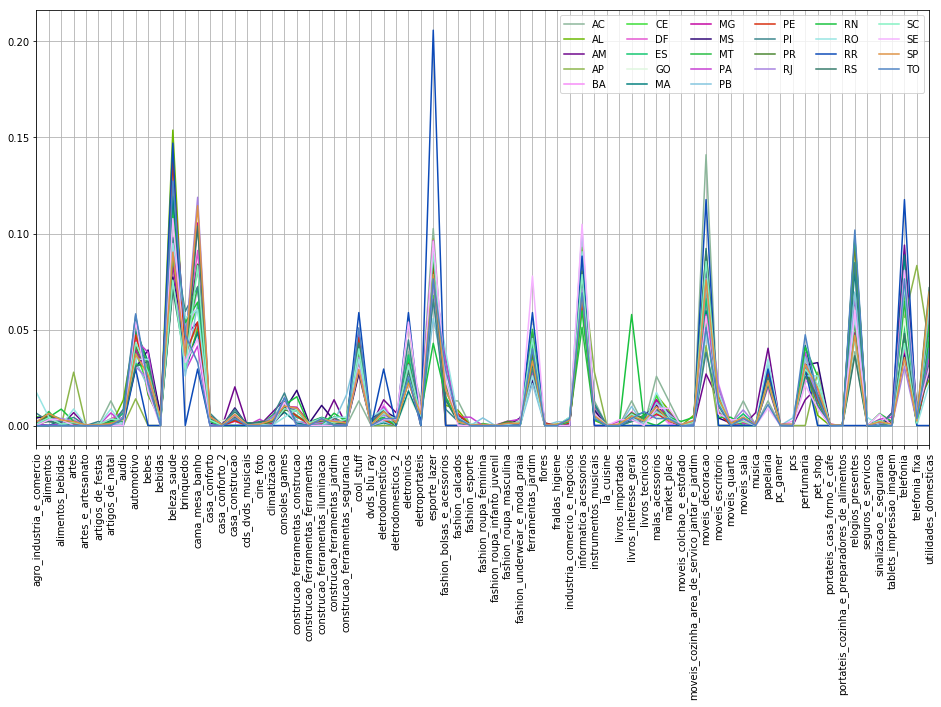

In [7]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
parallel_coordinates(a, 'state', axvlines=False)
plt.legend(loc='upper right', labels=a['state'], ncol=6)

In [8]:
states

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='object', name='customer_state')

In [9]:
REGIONS = {
    "N": ['AC', 'AM', 'AP', 'RR', 'PA', 'TO', 'RO'],
    "S": ['SC', 'RS', 'PR'],
    "SE": ['SP', 'RJ', 'ES', 'MG'],
    "NE": ['BA', 'MA', 'CE', 'PB', 'SE', 'PE', 'RN', 'AL', 'PI'],
    "CO": ['GO', 'DF', 'MT', 'MS'],
}

def region(state):
    for region, states in REGIONS.items():
        if state in states:
            return region
    return "WTF"

b = a.copy()
b['state'] = b['state'].apply(region)
b.head()

product_category_name,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,...,portateis_casa_forno_e_cafe,portateis_cozinha_e_preparadores_de_alimentos,relogios_presentes,seguros_e_servicos,sinalizacao_e_seguranca,tablets_impressao_imagem,telefonia,telefonia_fixa,utilidades_domesticas,state
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.012821,0.000000,0.051282,0.025641,...,0.000000,0.000000,0.038462,0.0,0.000000,0.000000,0.051282,0.000000,0.051282,N
1,0.000000,0.002653,0.002653,0.000000,0.0,0.0,0.000000,0.013263,0.050398,0.015915,...,0.000000,0.000000,0.068966,0.0,0.000000,0.000000,0.066313,0.010610,0.023873,NE
2,0.000000,0.006711,0.000000,0.006711,0.0,0.0,0.000000,0.006711,0.040268,0.033557,...,0.000000,0.000000,0.067114,0.0,0.000000,0.006711,0.093960,0.006711,0.026846,N
3,0.000000,0.000000,0.000000,0.027778,0.0,0.0,0.000000,0.000000,0.013889,0.000000,...,0.000000,0.000000,0.097222,0.0,0.000000,0.000000,0.055556,0.083333,0.041667,N
4,0.000874,0.004371,0.002331,0.002914,0.0,0.0,0.002622,0.004079,0.041958,0.024767,...,0.000291,0.000291,0.061480,0.0,0.001748,0.001748,0.068765,0.002914,0.041084,NE


In [10]:
categories = sorted(products['product_category_name'].unique())
print(''.join(map(lambda c: c.ljust(60), categories)))

agro_industria_e_comercio                                   alimentos                                                   alimentos_bebidas                                           artes                                                       artes_e_artesanato                                          artigos_de_festas                                           artigos_de_natal                                            audio                                                       automotivo                                                  bebes                                                       bebidas                                                     beleza_saude                                                brinquedos                                                  cama_mesa_banho                                             casa_conforto                                               casa_conforto_2                                             casa_construcao                         

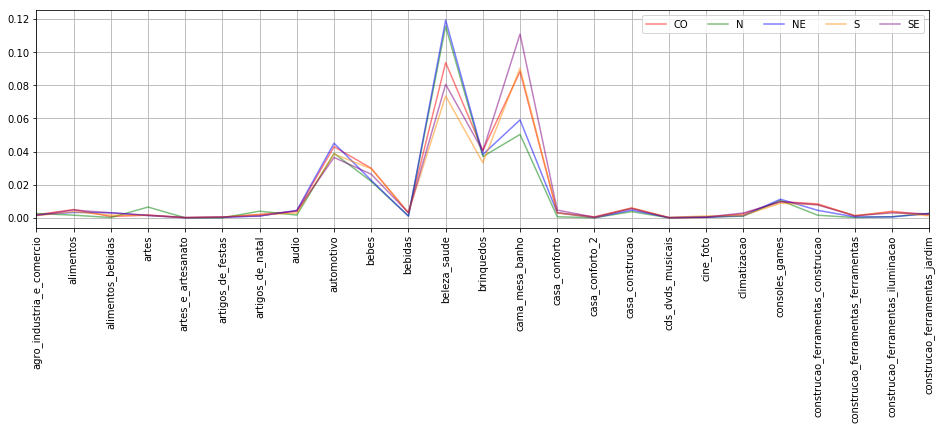

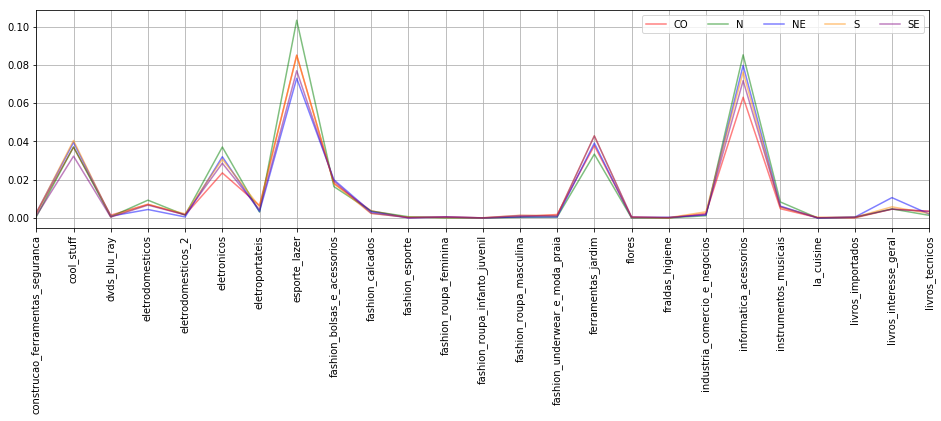

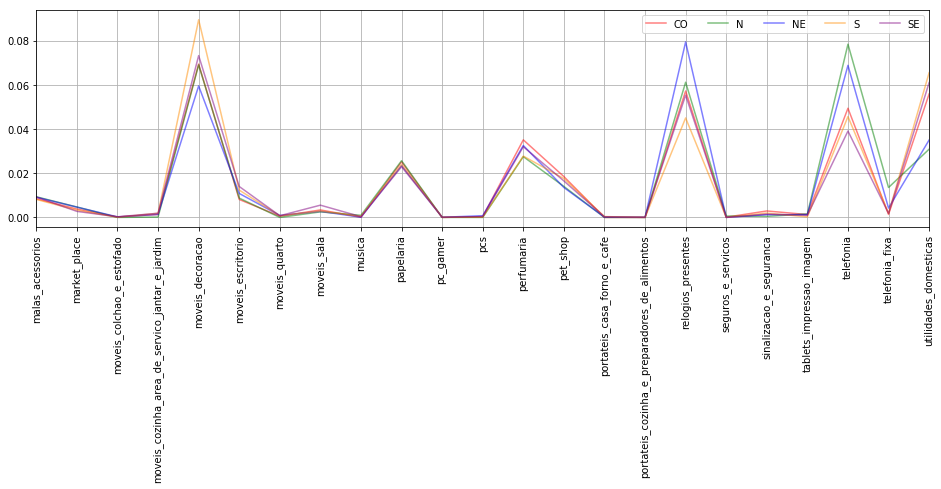

In [11]:
for group in np.split(np.array(categories), [25, 50]):
    plt.figure(figsize=(16, 4))
    plt.xticks(rotation=90)

    by_region = b.groupby('state').agg('mean')[group].reset_index()
    parallel_coordinates(by_region, 'state', axvlines=False, color=['red', 'green', 'blue', 'darkorange', 'purple'], alpha=0.5)
    plt.legend(loc='upper right', labels=by_region['state'], ncol=6)
    plt.show()

In [12]:
print('p-value: ', stats.kruskal(*b.groupby('state').agg('mean')[group].values).pvalue * 100, '%', sep='')

p-value: 99.4843068387663%


A partir da observação dos gráficos, imaginávamos que haveria uma grande variação entre as distribuições. O teste de Kruskal-Wallis, porém, obteve um p-value de 99.5%, indicando que as distribuições são muito semelhantes, e todos as regiões possuem padrões parecidos de compras, não havendo diferenças características entre eles

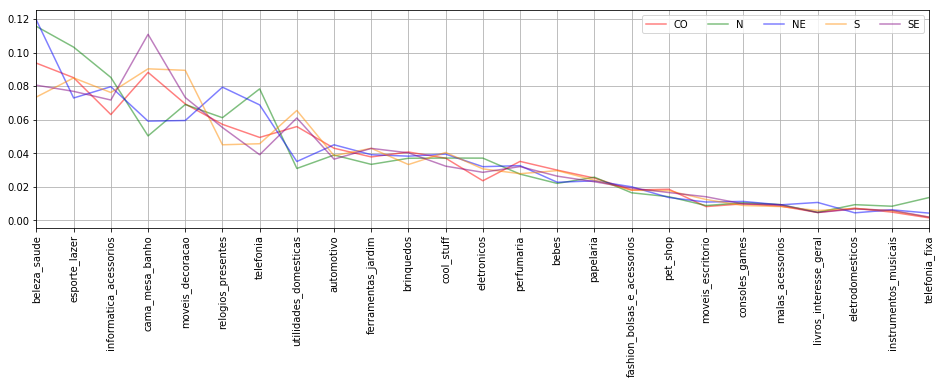

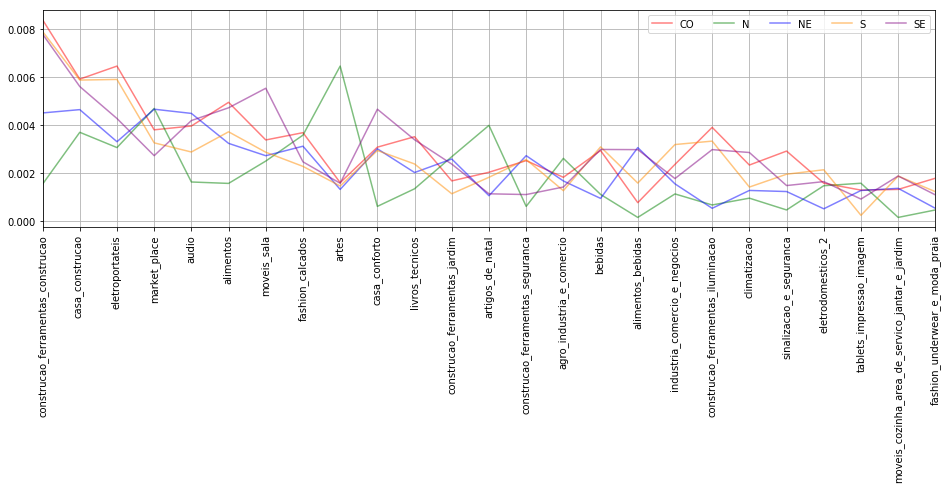

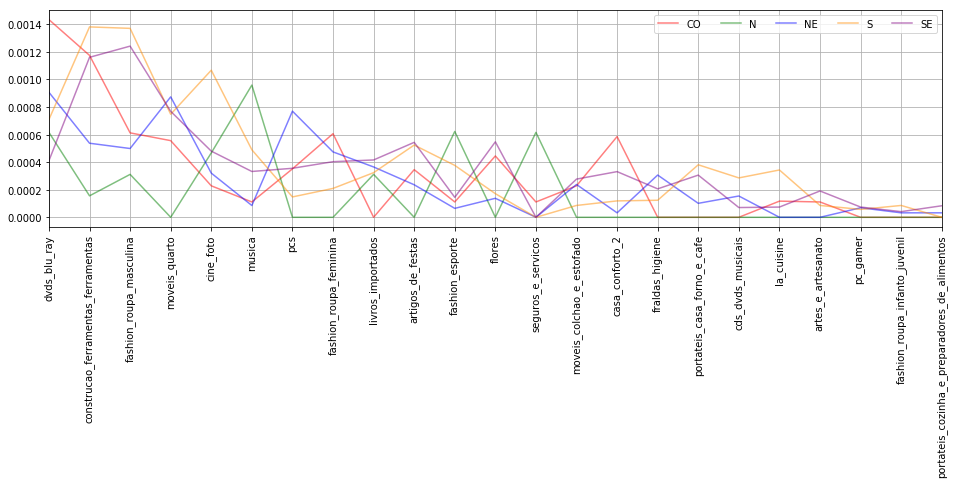

In [13]:
c = list(reversed(sorted([(column, b[column].mean()) for column in categories], key=lambda x:x[1])))

for group in np.split(np.array(c), [25, 50]):
    group = [g[0] for g in group]
    plt.figure(figsize=(16, 4))
    plt.xticks(rotation=90)

    by_region = b.groupby('state').agg('mean')[group].reset_index()
    parallel_coordinates(by_region, 'state', axvlines=False, color=['red', 'green', 'blue', 'darkorange', 'purple'], alpha=0.5)
    plt.legend(loc='upper right', labels=by_region['state'], ncol=6)
    plt.show()